# BIKE SHARING DEMAND



#### To understand the factors affecting the demand for the shared bikes in the American market and help BoomBikes to manipulate their business strategy to meet the demand levels and meet the customer's expectations

### IMPORT LIBRARIES

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import sklearn
from sklearn.model_selection import train_test_split

### READING DATA

In [5]:
bike_df=pd.read_csv("/Users/mnarasap/Downloads/day.csv")
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
bike_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [10]:
bike_df.shape

(730, 16)

### DATA CLEANING AND PREPARATION

In [11]:
# Dropping the columns which are not useful further going like dteday,instant,casual and registered

bike_df=bike_df.drop(columns=['instant','dteday','casual','registered'])
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
#Confirmed no null values
bike_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [13]:
# Observing categorical variables season, holiday, workingday

bike_df['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [14]:
bike_df['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [15]:
bike_df['workingday'].value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [17]:
bike_df['yr'].value_counts()

1    365
0    365
Name: yr, dtype: int64

In [18]:
#checkimg correlation just to check at the beginning
bike_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-2.248195e-17,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-2.248195e-17,1.000000e+00,-2.470170e-17,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-2.470170e-17,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


In [19]:
#dropping atemp and considering temp as temp is the actual temperature and both have very less difference in correlation values
#so i am going to consider temp for analysis

bike_df=bike_df.drop(columns=['atemp'])
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [20]:
#checkimg correlation just to check at the beginning
#season is highly correlated
bike_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
season,1.000000e+00,-2.248195e-17,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.208220,-0.229607,0.404584
yr,-2.248195e-17,1.000000e+00,-2.470170e-17,0.008195,-0.005466,-0.002945,-0.050322,0.048789,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-2.470170e-17,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.128565,-0.158186,0.627044
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,1.000000,-0.248506,-0.098543
windspeed,-2.296069e-01,-1.162435e-02,-2.080131e-01,0.006257,0.014283,-0.018666,0.039769,-0.158186,-0.248506,1.000000,-0.235132


### Data Visualization 

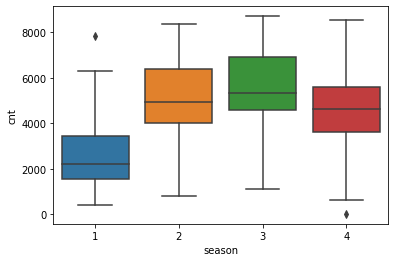

In [21]:
#making analysis on categorical variable season and numerical variable cnt :season (1:spring, 2:summer, 3:fall, 4:winter) : 
#From below we can observe the demand during spring season is low compared to other seasons considering median 
#there is an outlier present near 8000 cnt for the sales in spring season
sns.boxplot(x='season',y='cnt',data=bike_df)


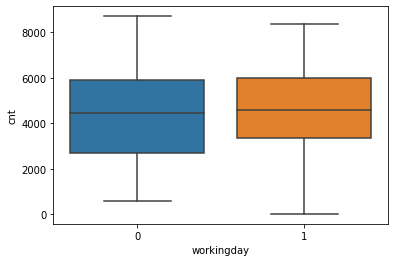

In [22]:
#Analysis on workingday vs cnt, the correlation also looks very poor
sns.boxplot(x='workingday',y='cnt',data=bike_df)

In [25]:
bike_df['workingday'].value_counts()

1    499
0    231
Name: workingday, dtype: int64

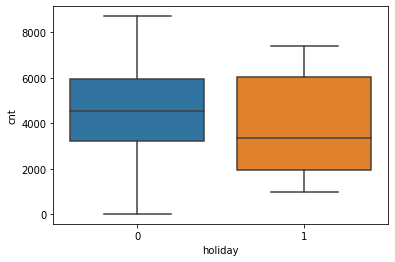

In [26]:
#Analysis on holiday vs cnt , how much the demand is on holiday
#demand is more when its not a holiday 
sns.boxplot(x='holiday',y='cnt',data=bike_df)


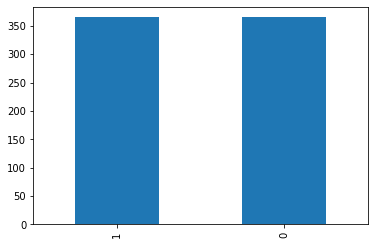

In [28]:
#The demand in year 2018 and in 2019 seem to be the same for now
bike_df['yr'].value_counts().head(10).plot.bar()

In [29]:
bike_df['yr'].value_counts()

1    365
0    365
Name: yr, dtype: int64

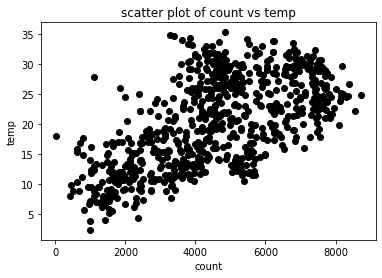

In [32]:
#scatter plot between count and temp, there was a maximum demand when temerature was between 10 to 25
 
cnt_x= bike_df['cnt']
temp_y= bike_df['temp']

plt.title("scatter plot of count vs temp")
plt.xlabel("count")
plt.ylabel("temp")

plt.scatter(cnt_x,temp_y,color='k')
plt.show()

In [33]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


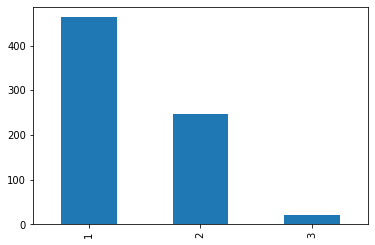

In [34]:
#checking when the maximum demand according to weathersit
#on 1: Clear, Few clouds, Partly cloudy there is a maximum demand with count almost 500
bike_df['weathersit'].value_counts().head(10).plot.bar()

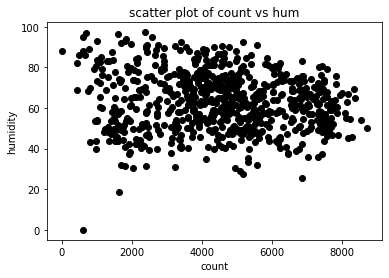

In [35]:
#scatter plot between count and humididty
#When the humidity was 40 to 80 the maximum demand took place
 
cnt_x= bike_df['cnt']
hum_y= bike_df['hum']

plt.title("scatter plot of count vs hum")
plt.xlabel("count")
plt.ylabel("humidity")

plt.scatter(cnt_x,hum_y,color='k')
plt.show()

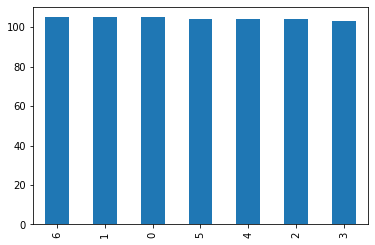

In [39]:
bike_df['weekday'].value_counts().head(10).plot.bar()

In [40]:
bike_df['weekday'].value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

<Figure size 2160x1800 with 0 Axes>

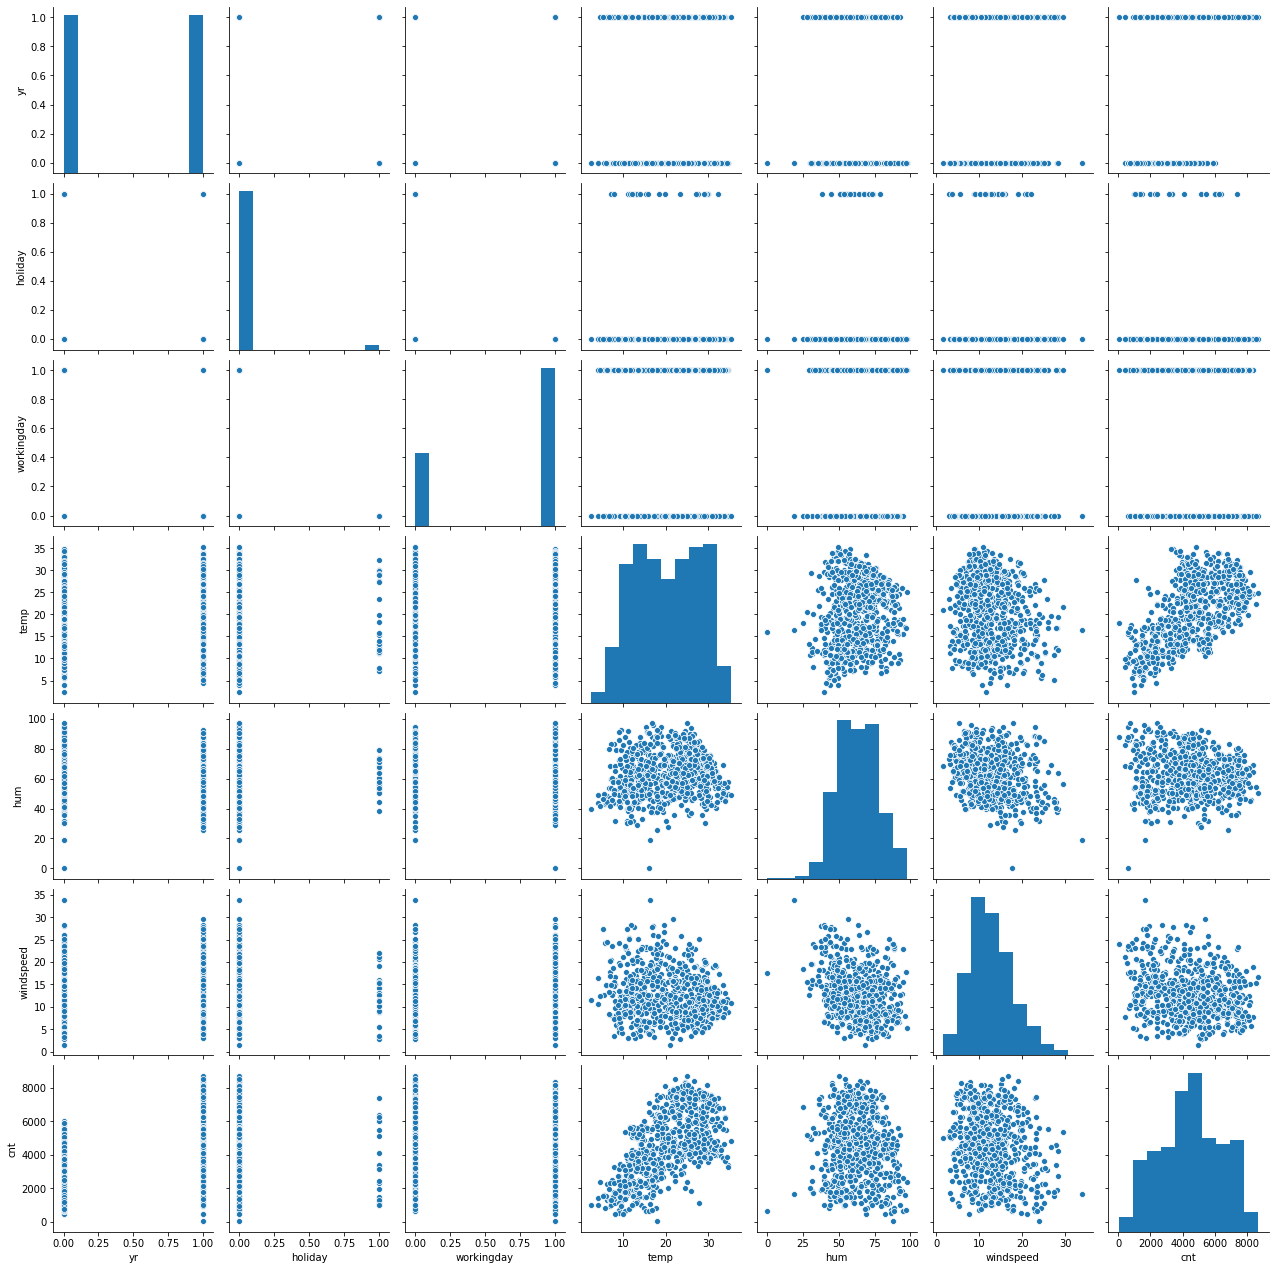

In [218]:
#Paiplot on some of the variables (for both numerical and categorical variables)
plt.figure(figsize=(30,25))
sns.pairplot(bike_df, x_vars = ['yr','holiday','workingday','temp','hum','windspeed','cnt'],y_vars = ['yr','holiday','workingday','temp','hum','windspeed','cnt'])
plt.show()

### Converting categorical to object variables and dummifying the variables Season , month , weekday, weathersit


In [41]:
# Define a function to map the categorical variables to object variable so that it can be put as input in get_dummies
def season_map(x):
    return x.map({1:'spring', 2:'summer', 3: 'fall', 4: 'winter'})

# Apply the function to the 'season' column of the dataframe
bike_df[['season']] = bike_df[['season']].apply(season_map)

In [45]:
bike_df['season'].value_counts()
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [46]:
#function for the 'mnth' column of the dataframe
def month_map(x):
    return x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'may',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})

bike_df[['mnth']]=bike_df[['mnth']].apply(month_map)

In [47]:
bike_df['mnth'].value_counts()

Jul     62
Aug     62
Oct     62
may     62
Dec     62
Jan     62
Mar     62
Apr     60
Nov     60
Jun     60
Sept    60
Feb     56
Name: mnth, dtype: int64

In [48]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,6,0,2,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,0,0,2,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,1,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,2,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,3,1,1,9.305237,43.6957,12.522300,1600


In [49]:
#converting weekday from categorical to object type
def weekday_map(x):
    return x.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thur',5:'Fri',6:'Sat'})

bike_df[['weekday']]=bike_df[['weekday']].apply(weekday_map)

In [50]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,2,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,2,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,1,9.305237,43.6957,12.522300,1600


In [51]:
bike_df.weekday.value_counts()

Sat     105
Mon     105
Sun     105
Fri     104
Thur    104
Tue     104
Wed     103
Name: weekday, dtype: int64

In [52]:
#converting weathersit into object variable
def weathersit_map(x):
    return x.map({1:'clear',2:'mist_cloudy',3:'light_snowrain',4:'heavy_rainsnow'})

bike_df[['weathersit']]=bike_df[['weathersit']].apply(weathersit_map)

In [53]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,mist_cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,mist_cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,clear,9.305237,43.6957,12.522300,1600


In [55]:
bike_df.weathersit.value_counts()

clear             463
mist_cloudy       246
light_snowrain     21
Name: weathersit, dtype: int64

In [ ]:
#from the above we can see that there was no demand for bike sharing during heavy rains, there is no entry of it

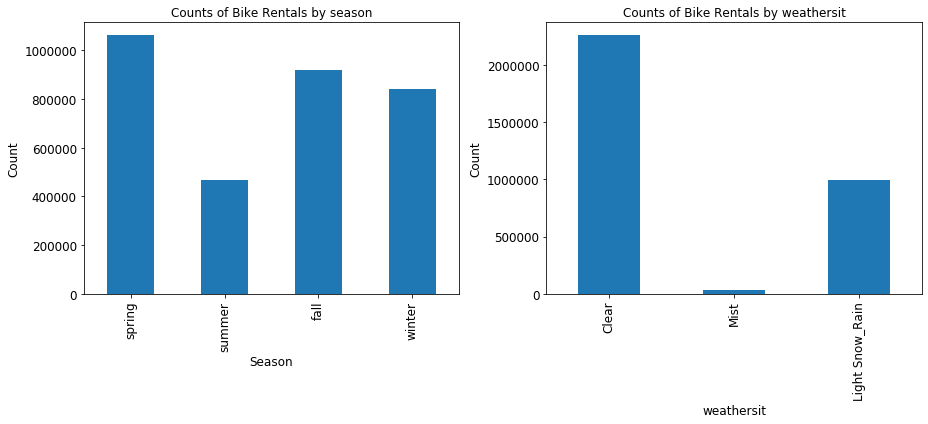

In [58]:
#Analysing on Season and Weathersit in a subplot , each variable vs the cnt.
#The demand clearly more during spring season and when the weather is clear.
#the demand is less when the weather is mist and when the season is summer.

f,(season_col,weathersit_col)  =  plt.subplots(nrows=1, ncols=2, figsize=(13, 6))

season_col = bike_df[['season','cnt']].groupby(['season']).sum().reset_index().plot(kind='bar',
                                       legend = False, title ="Counts of Bike Rentals by season", 
                                         stacked=True, fontsize=12, ax=season_col)
season_col.set_xlabel("Season", fontsize=12)
season_col.set_ylabel("Count", fontsize=12)
season_col.set_xticklabels(['spring','summer','fall','winter'])

weathersit_col = bike_df[['weathersit','cnt']].groupby(['weathersit']).sum().reset_index().plot(kind='bar',  
      legend = False, stacked=True, title ="Counts of Bike Rentals by weathersit", fontsize=12, ax=weathersit_col)

weathersit_col.set_xlabel("weathersit", fontsize=12)
weathersit_col.set_ylabel("Count", fontsize=12)
weathersit_col.set_xticklabels(['Clear','Mist','Light Snow_Rain','Heavy Rain snow'])

f.tight_layout()

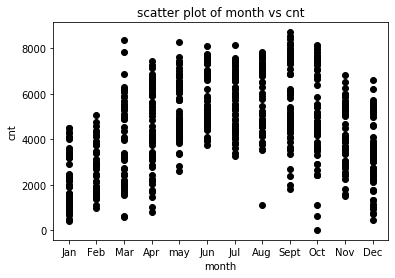

In [60]:
#checking for which month there was highest demand : In the month of september and october
month_x= bike_df['mnth']
cnt_y= bike_df['cnt']

plt.title("scatter plot of month vs cnt")
plt.xlabel("month")
plt.ylabel("cnt")

plt.scatter(month_x,cnt_y,color='k')
plt.show()

#### Dummify the variables Season , month , weekday, weathersit

In [62]:
#Done with the conversions , now its time to dummify the variables Season , month , weekday, weathersit
#Performing dummy operation on season column

season_df=pd.get_dummies(bike_df['season'],drop_first=True)
season_df.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [63]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,mist_cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,mist_cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,clear,9.305237,43.6957,12.522300,1600


In [64]:
bike_df=pd.concat([bike_df,season_df],axis=1)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,Jan,0,Sat,0,mist_cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,Jan,0,Sun,0,mist_cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,Jan,0,Mon,1,clear,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Tue,1,clear,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Wed,1,clear,9.305237,43.6957,12.522300,1600,1,0,0


In [65]:
bike_df.tail()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
725,spring,1,Dec,0,Thur,1,mist_cloudy,10.420847,65.2917,23.458911,2114,1,0,0
726,spring,1,Dec,0,Fri,1,mist_cloudy,10.386653,59.0000,10.416557,3095,1,0,0
727,spring,1,Dec,0,Sat,0,mist_cloudy,10.386653,75.2917,8.333661,1341,1,0,0
728,spring,1,Dec,0,Sun,0,clear,10.489153,48.3333,23.500518,1796,1,0,0
729,spring,1,Dec,0,Mon,1,mist_cloudy,8.849153,57.7500,10.374682,2729,1,0,0


In [67]:
#confirmed whether chanes were applied
bike_df[50:80]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
50,spring,0,Feb,0,Sun,0,clear,11.693897,40.7826,14.956745,1812,1,0,0
51,spring,0,Feb,1,Mon,0,mist_cloudy,12.436653,60.5000,20.625682,1107,1,0,0
52,spring,0,Feb,0,Tue,1,clear,7.471102,57.7778,13.110761,1450,1,0,0
53,spring,0,Feb,0,Wed,1,clear,9.091299,42.3043,6.305571,1917,1,0,0
54,spring,0,Feb,0,Thur,1,mist_cloudy,12.121732,69.7391,16.783232,1807,1,0,0
55,spring,0,Feb,0,Fri,1,mist_cloudy,14.938268,71.2174,23.218113,1461,1,0,0
56,spring,0,Feb,0,Sat,0,clear,11.582500,53.7917,12.500257,1969,1,0,0
57,spring,0,Feb,0,Sun,0,clear,14.082598,68.0000,8.391616,2402,1,0,0
58,spring,0,Feb,0,Mon,1,mist_cloudy,16.698193,87.6364,19.408962,1446,1,0,0
59,spring,0,Mar,0,Tue,1,clear,10.933347,53.5000,14.500475,1851,1,0,0


In [68]:
bike_df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [ ]:
#drop the season column and all other columns which are dummified


In [69]:
#dummyfying month , mnth column
month_df=pd.get_dummies(bike_df['mnth'],drop_first=True)
month_df.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,Nov,Oct,Sept,may
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [70]:
bike_df=pd.concat([bike_df,month_df],axis=1)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Dec,Feb,Jan,Jul,Jun,Mar,Nov,Oct,Sept,may
0,spring,0,Jan,0,Sat,0,mist_cloudy,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Sun,0,mist_cloudy,14.902598,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Mon,1,clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,clear,8.200000,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Wed,1,clear,9.305237,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [71]:
#dummyfying weekday column

weekday_df=pd.get_dummies(bike_df['weekday'],drop_first=True)
weekday_df.head()

,Mon,Sat,Sun,Thur,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [72]:
bike_df=pd.concat([bike_df,weekday_df],axis=1)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Nov,Oct,Sept,may,Mon,Sat,Sun,Thur,Tue,Wed
0,spring,0,Jan,0,Sat,0,mist_cloudy,14.110847,80.5833,10.749882,...,0,0,0,0,0,1,0,0,0,0
1,spring,0,Jan,0,Sun,0,mist_cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,0
2,spring,0,Jan,0,Mon,1,clear,8.050924,43.7273,16.636703,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,0,1,0
4,spring,0,Jan,0,Wed,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,1


In [73]:
#dummyfying weathersit column values 
#although we have four categories in weathersit, no bike sharing took place when heavy rain fall, so now 3-1=2 dummy value columns are returned.  
#so other than 00, 01 any value implies for the weathersit '1:clear'
weathersit_df=pd.get_dummies(bike_df['weathersit'],drop_first=True)
weathersit_df.head()


,light_snowrain,mist_cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [74]:
bike_df.weathersit.value_counts()

clear             463
mist_cloudy       246
light_snowrain     21
Name: weathersit, dtype: int64

In [75]:
bike_df=pd.concat([bike_df,weathersit_df],axis=1)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Sept,may,Mon,Sat,Sun,Thur,Tue,Wed,light_snowrain,mist_cloudy
0,spring,0,Jan,0,Sat,0,mist_cloudy,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sun,0,mist_cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Mon,1,clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wed,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [76]:
bike_df.corr()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Sept,may,Mon,Sat,Sun,Thur,Tue,Wed,light_snowrain,mist_cloudy
yr,1.000000e+00,0.008195,-0.002945,0.048789,-0.112547,-0.011624,0.569728,-1.623119e-17,-5.254075e-18,1.700090e-17,...,-9.413392e-18,-1.363849e-19,0.003904,-0.003904,0.003904,2.175587e-19,6.526760e-19,-0.003935,-0.073758,-0.005796
holiday,8.195345e-03,1.000000,-0.252948,-0.028764,-0.015662,0.006257,-0.068764,3.464187e-02,-2.440810e-02,1.678505e-02,...,8.174933e-03,6.362682e-03,0.279764,-0.070541,-0.070541,-2.325423e-02,-4.670117e-02,-0.046213,-0.029619,-0.018668
workingday,-2.945396e-03,-0.252948,1.000000,0.053470,0.023202,-0.018666,0.062542,-2.761520e-02,1.509123e-02,-4.623058e-03,...,-1.087082e-02,6.541813e-03,0.152976,-0.602419,-0.602419,2.604690e-01,2.688958e-01,0.267305,0.028990,0.048877
temp,4.878919e-02,-0.028764,0.053470,1.000000,0.128565,-0.158186,0.627044,-6.194080e-01,1.548756e-01,-2.255900e-01,...,1.977294e-01,1.651884e-01,-0.004799,-0.030363,-0.026802,1.949216e-02,1.935952e-02,0.023459,-0.058461,-0.096297
hum,-1.125471e-01,-0.015662,0.023202,0.128565,1.000000,-0.248506,-0.098543,-1.848840e-01,-2.870035e-03,1.639076e-01,...,1.831181e-01,1.312731e-01,0.028591,-0.023310,0.000020,-5.200348e-02,4.061570e-02,0.046059,0.267592,0.490628
windspeed,-1.162435e-02,0.006257,-0.018666,-0.158186,-0.248506,1.000000,-0.235132,1.788801e-01,9.742067e-02,-1.356120e-01,...,-9.482530e-02,-2.953449e-02,0.000999,0.032187,-0.010429,5.792278e-03,6.961095e-03,-0.014025,0.117332,-0.037177
cnt,5.697285e-01,-0.068764,0.062542,0.627044,-0.098543,-0.235132,1.000000,-5.617018e-01,1.453245e-01,6.461909e-02,...,1.946635e-01,1.325529e-01,-0.035991,0.009012,-0.059146,3.355106e-02,5.596898e-04,0.014012,-0.240602,-0.170686
spring,-1.623119e-17,0.034642,-0.027615,-0.619408,-0.184884,0.178880,-0.561702,1.000000e+00,-3.320989e-01,-3.248593e-01,...,-1.711958e-01,-1.742860e-01,0.000993,0.010049,0.010049,-5.854320e-03,-5.854320e-03,-0.012756,-0.022400,0.029198
summer,-5.254075e-18,-0.024408,0.015091,0.154876,-0.002870,0.097421,0.145325,-3.320989e-01,1.000000e+00,-3.296500e-01,...,-1.737204e-01,5.248014e-01,0.004803,-0.004187,-0.004187,-1.928926e-03,-1.928926e-03,0.009410,-0.043283,0.040011
winter,1.700090e-17,0.016785,-0.004623,-0.225590,0.163908,-0.135612,0.064619,-3.248593e-01,-3.296500e-01,1.000000e+00,...,1.591136e-02,-1.730008e-01,0.003611,-0.005479,0.003611,-3.275804e-03,5.851436e-03,-0.001055,0.093128,0.033857


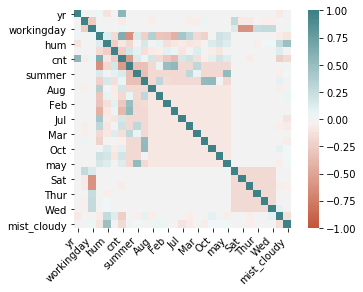

In [91]:
#Representation of correlation matrix using heatmap
corr_bike_df = bike_df.corr()
ax = sns.heatmap(
    corr_bike_df, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, n=280),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

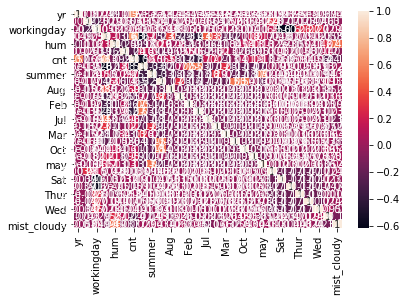

In [83]:
#ignore this heatmap , further going we will draw a proper heatmap
sns.heatmap(bike_df.corr(),annot=True)

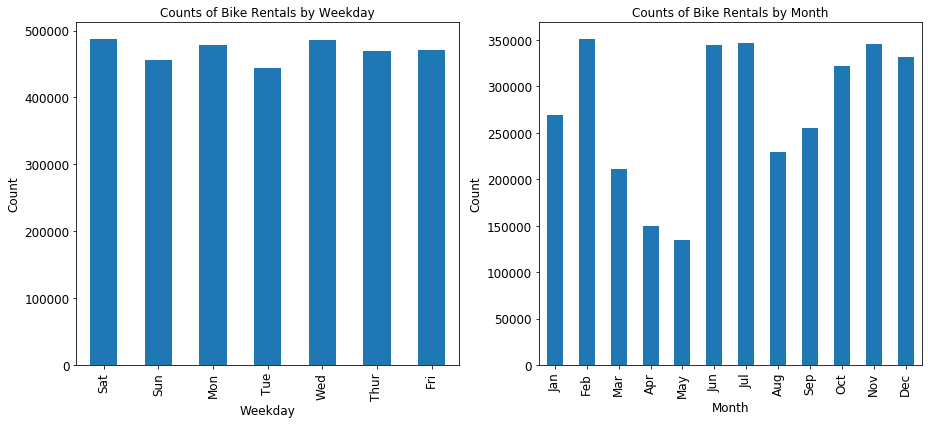

In [79]:
#Analysing on Weekday and Month in a subplot , each variable vs the cnt.
#The demand clearly more during Saturdays and Wednesdays , considering other weekdays.
#The demand is more in Feb , June , July and November compared to other months.

f,(weekday_col,month_col)  =  plt.subplots(nrows=1, ncols=2, figsize=(13, 6))

weekday_col = bike_df[['weekday','cnt']].groupby(['weekday']).sum().reset_index().plot(kind='bar',
                                       legend = False, title ="Counts of Bike Rentals by Weekday", 
                                         stacked=True, fontsize=12, ax=weekday_col)
weekday_col.set_xlabel("Weekday", fontsize=12)
weekday_col.set_ylabel("Count", fontsize=12)
weekday_col.set_xticklabels(['Sat','Sun','Mon','Tue','Wed','Thur','Fri','Sat'])

month_col= bike_df[['mnth','cnt']].groupby(['mnth']).sum().reset_index().plot(kind='bar',  
      legend = False, stacked=True, title ="Counts of Bike Rentals by Month", fontsize=12, ax=month_col)

month_col.set_xlabel("Month", fontsize=12)
month_col.set_ylabel("Count", fontsize=12)
month_col.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

f.tight_layout()

In [92]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Sept,may,Mon,Sat,Sun,Thur,Tue,Wed,light_snowrain,mist_cloudy
0,spring,0,Jan,0,Sat,0,mist_cloudy,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sun,0,mist_cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Mon,1,clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wed,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [93]:
#dropping already dummified columns
bike_df=bike_df.drop(columns=['season','mnth','weekday','weathersit'])
bike_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Sept,may,Mon,Sat,Sun,Thur,Tue,Wed,light_snowrain,mist_cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### Splitting dataframe into train and test datasets 

In [94]:
bike_df.shape

(730, 29)

In [95]:
#already have imported the library needed above for train_test_split

np.random.seed(0)
df_train,df_test=train_test_split(bike_df,train_size=0.70,test_size=0.30,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


### Rescaling the features using MinMaxScaler

In [96]:
#importing necessary library
from sklearn.preprocessing import MinMaxScaler

#creating scaling object
scaler=MinMaxScaler()

In [97]:
num_vars=['temp','hum','windspeed','cnt']

df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Sept,may,Mon,Sat,Sun,Thur,Tue,Wed,light_snowrain,mist_cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


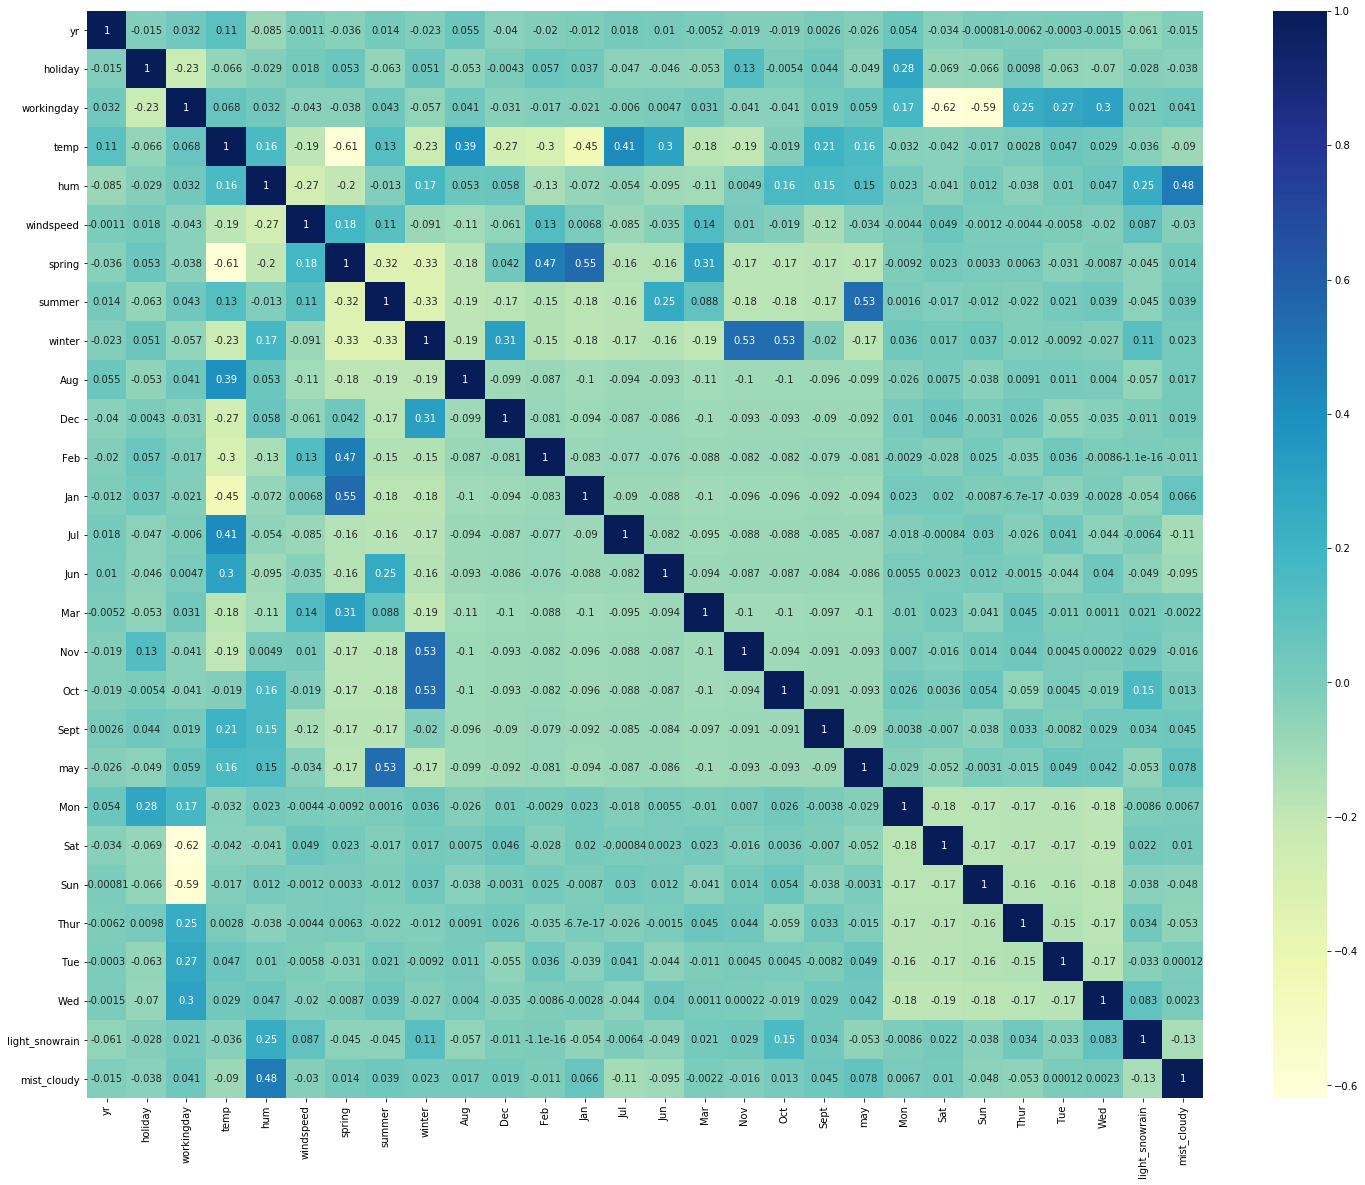

In [181]:
#Checking correlation 
plt.figure(figsize=(25,20))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

### DIVIDING the data into X and Y

In [100]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Sept,may,Mon,Sat,Sun,Thur,Tue,Wed,light_snowrain,mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.080392,0.084314,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.272166,0.278131,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
df_train.shape

(510, 29)

In [102]:
df_test.shape

(219, 29)

In [103]:
#Dividing training set to X and y

y_train=df_train.pop('cnt')
X_train=df_train

In [104]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [105]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,...,Sept,may,Mon,Sat,Sun,Thur,Tue,Wed,light_snowrain,mist_cloudy
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


### Feature selection using RFE 

In [106]:
#importing necessary libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [107]:
#Runninf RFE with 15 variables
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)

In [108]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('Nov', False, 2),
 ('Oct', False, 10),
 ('Sept', True, 1),
 ('may', False, 5),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 7),
 ('Thur', False, 11),
 ('Tue', False, 9),
 ('Wed', False, 12),
 ('light_snowrain', True, 1),
 ('mist_cloudy', True, 1)]

In [109]:
#useful columns needs to be considered by RFE
col_train=X_train.columns[rfe.support_]
col_train

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jan', 'Jul', 'Sept', 'Sat', 'light_snowrain',
       'mist_cloudy'],
      dtype='object')

In [110]:
#columns excluded by RFE and should not be considered
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'Nov', 'Oct', 'may', 'Mon', 'Sun',
       'Thur', 'Tue', 'Wed'],
      dtype='object')

### BUILDING MODEL USING STATSMODEL

In [111]:
X_train_rfe=X_train[col_train]

In [112]:
X_train_rfe.head()


,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Jan,Jul,Sept,Sat,light_snowrain,mist_cloudy
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,0,1


In [113]:
X_train_rfe.shape

(510, 15)

In [114]:
#Adding constant variable

import statsmodels.api as sm
X_train_rfe=sm.add_constant(X_train_rfe)

In [115]:
lm=sm.OLS(y_train,X_train_rfe).fit()

In [136]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.31e-191
Time:                        09:49:49   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2510      0.036      6.949      0.000       0.180       0.322
yr                 0.2305      0.008     28.807      0.000       0.215       0.246
holiday           -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday         0.0435      0.012      3.781      0.000       0.021       0.066
temp               0.5098      0.034     14.851      0.000       0.442       0.577
hum               -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed         -0.1860      0.025     -7.301      0.000      -0.236      -0.136
spring            -0.0508      0.021     -2.461      0.014      -0.091      -0.010
summer             0.0497      0.015      3.346      0.001       0.020       0.079
winter             0.0944      0.017      5.479      0.000       0.061       0.128
Jan               -0.0343      0.017     -1.980      0.048      -0.068      -0.000
Jul               -0.0532      0.018     -2.947      0.003      -0.089      -0.018
Sept               0.0812      0.016      4.934      0.000       0.049       0.114
Sat                0.0537      0.014      3.707      0.000       0.025       0.082
light_snowrain    -0.2488      0.026     -9.560      0.000      -0.300      -0.198
mist_cloudy       -0.0578      0.010     -5.574      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
#The coefficients look good, p-value significance, so now need to check VIF value
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
X=X_train_rfe
vif['Features']= X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.48
7,summer,2.84
14,mist_cloudy,2.29
0,yr,2.09
12,Sat,1.98


In [139]:
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jan', 'Jul', 'Sept', 'Sat', 'light_snowrain',
       'mist_cloudy'],
      dtype='object')

In [141]:
#Now dropping humidity after seeing high vif value of 29.4
X_train_new=X_train_rfe.drop(['hum'],axis=1)


In [142]:
X_train_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'Jan', 'Jul', 'Sept', 'Sat', 'light_snowrain', 'mist_cloudy'],
      dtype='object')

In [143]:
#Rebuilding the model after dropping hum - 2nd one
import statsmodels.api as sm
X_train_lm1 = sm.add_constant(X_train_new)


In [144]:
lm2=sm.OLS(y_train,X_train_lm1).fit()

In [145]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          7.33e-189
Time:                        09:55:42   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.525      0.000       0.112       0.235
yr                 0.2344      0.008     29.019      0.000       0.218       0.250
holiday           -0.0562      0.027     -2.058      0.040      -0.110      -0.003
workingday         0.0465      0.012      3.983      0.000       0.024       0.069
temp               0.4728      0.034     14.037      0.000       0.407       0.539
windspeed         -0.1563      0.025     -6.292      0.000      -0.205      -0.107
spring            -0.0597      0.021     -2.861      0.004      -0.101      -0.019
summer             0.0434      0.015      2.890      0.004       0.014       0.073
winter             0.0797      0.017      4.650      0.000       0.046       0.113
Jan               -0.0389      0.018     -2.215      0.027      -0.073      -0.004
Jul               -0.0482      0.018     -2.635      0.009      -0.084      -0.012
Sept               0.0753      0.017      4.522      0.000       0.043       0.108
Sat                0.0584      0.015      3.980      0.000       0.030       0.087
light_snowrain    -0.2917      0.024    -12.027      0.000      -0.339      -0.244
mist_cloudy       -0.0826      0.009     -9.592      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       67.959   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.078
Skew:                          -0.690   Prob(JB):                     8.64e-37
Kurtosis:                       5.431   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
#checking vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
X=X_train_lm1
vif['Features']= X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif


,Features,VIF
0,const,62.00
6,spring,5.03
4,temp,3.62
8,winter,3.45
7,summer,2.61
3,workingday,1.87
12,Sat,1.77
9,Jan,1.56
10,Jul,1.48
11,Sept,1.29


In [149]:
#rechecked , dropping constant and building the model

X_train_new2=X_train_lm1.drop(['const'],axis=1)

In [150]:
#Rebuilding the model after dropping constant - 2nd one
import statsmodels.api as sm
X_train_new2.head()

,yr,holiday,workingday,temp,windspeed,spring,summer,winter,Jan,Jul,Sept,Sat,light_snowrain,mist_cloudy
653,1,0,1,0.509887,0.300794,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.255342,1,0,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.188475,0,1,0,0,0,0,1,0,1


In [157]:
X_train_new2.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'Jan', 'Jul', 'Sept', 'Sat', 'light_snowrain', 'mist_cloudy'],
      dtype='object')

In [152]:
X_train_lm21 = sm.add_constant(X_train_new2)

In [153]:
lm21=sm.OLS(y_train,X_train_lm21).fit()

In [154]:
lm21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          7.33e-189
Time:                        10:11:22   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.525      0.000       0.112       0.235
yr                 0.2344      0.008     29.019      0.000       0.218       0.250
holiday           -0.0562      0.027     -2.058      0.040      -0.110      -0.003
workingday         0.0465      0.012      3.983      0.000       0.024       0.069
temp               0.4728      0.034     14.037      0.000       0.407       0.539
windspeed         -0.1563      0.025     -6.292      0.000      -0.205      -0.107
spring            -0.0597      0.021     -2.861      0.004      -0.101      -0.019
summer             0.0434      0.015      2.890      0.004       0.014       0.073
winter             0.0797      0.017      4.650      0.000       0.046       0.113
Jan               -0.0389      0.018     -2.215      0.027      -0.073      -0.004
Jul               -0.0482      0.018     -2.635      0.009      -0.084      -0.012
Sept               0.0753      0.017      4.522      0.000       0.043       0.108
Sat                0.0584      0.015      3.980      0.000       0.030       0.087
light_snowrain    -0.2917      0.024    -12.027      0.000      -0.339      -0.244
mist_cloudy       -0.0826      0.009     -9.592      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       67.959   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.078
Skew:                          -0.690   Prob(JB):                     8.64e-37
Kurtosis:                       5.431   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:
#calculating vif 

vif=pd.DataFrame()
X=X_train_new2
vif['Features']= X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif


,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,spring,3.08
6,summer,2.33
0,yr,2.08
7,winter,1.99
11,Sat,1.97
8,Jan,1.62
9,Jul,1.59


In [167]:
#checking columns with current X_train_new2 model which has temp variable
X_train_new2.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'Jan', 'Jul', 'Sept', 'Sat', 'light_snowrain', 'mist_cloudy'],
      dtype='object')

In [170]:
#NOW its time to remove temp variable which has high vif , though it has significant p-value, but let's check once
X_train_new3=X_train_new2.drop(['temp'],axis=1)

In [171]:
#checking columns after that, temp has been removed
X_train_new3.columns

Index(['yr', 'holiday', 'workingday', 'windspeed', 'spring', 'summer',
       'winter', 'Jan', 'Jul', 'Sept', 'Sat', 'light_snowrain', 'mist_cloudy'],
      dtype='object')

In [172]:
#let's build the model without temp now
X_train_lm31 = sm.add_constant(X_train_new3)

In [173]:
lm31=sm.OLS(y_train,X_train_lm31).fit()

In [174]:
lm31.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     136.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.04e-154
Time:                        12:13:25   Log-Likelihood:                 425.72
No. Observations:                 510   AIC:                            -823.4
Df Residuals:                     496   BIC:                            -764.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5448      0.020     27.136      0.000       0.505       0.584
yr                 0.2478      0.009     26.156      0.000       0.229       0.266
holiday           -0.0571      0.032     -1.771      0.077      -0.120       0.006
workingday         0.0480      0.014      3.482      0.001       0.021       0.075
windspeed         -0.1878      0.029     -6.429      0.000      -0.245      -0.130
spring            -0.2603      0.018    -14.490      0.000      -0.296      -0.225
summer            -0.0440      0.016     -2.729      0.007      -0.076      -0.012
winter            -0.0749      0.016     -4.829      0.000      -0.105      -0.044
Jan               -0.1024      0.020     -5.104      0.000      -0.142      -0.063
Jul               -0.0099      0.021     -0.461      0.645      -0.052       0.032
Sept               0.0708      0.020      3.601      0.000       0.032       0.109
Sat                0.0564      0.017      3.252      0.001       0.022       0.090
light_snowrain    -0.3045      0.029    -10.634      0.000      -0.361      -0.248
mist_cloudy       -0.0896      0.010     -8.824      0.000      -0.110      -0.070
==============================================================================
Omnibus:                       34.622   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.832
Skew:                          -0.419   Prob(JB):                     3.07e-15
Kurtosis:                       4.563   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
# We noticed that the R^2 value has dropped to 0.78 after removing temp, so this means temp is a considerate variable and should not be dropped.
# Although humidity has a high p-value, we have to check R^2, we have to start building the mode with temp X_train_new2 model. 

X_train_new2.columns


Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'Jan', 'Jul', 'Sept', 'Sat', 'light_snowrain', 'mist_cloudy'],
      dtype='object')

In [176]:
#From the model X_train_new2 we had calculated vif , where temp had 7 and working day had 5.24 vif
#So we will now remove 2nd highest vif value column i.e, workingday and build new model after dropping it

X_train_new4=X_train_new2.drop(['workingday'],axis=1)

In [177]:
X_train_new4.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'Jan', 'Jul', 'Sept', 'Sat', 'light_snowrain', 'mist_cloudy'],
      dtype='object')

In [178]:
#Building model without workingday
X_train_lm41 = sm.add_constant(X_train_new4)

In [179]:
lm41=sm.OLS(y_train,X_train_lm41).fit()

In [180]:
lm41.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.21e-186
Time:                        12:52:16   Log-Likelihood:                 503.12
No. Observations:                 510   AIC:                            -978.2
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2121      0.030      6.986      0.000       0.152       0.272
yr                 0.2346      0.008     28.628      0.000       0.219       0.251
holiday           -0.0939      0.026     -3.614      0.000      -0.145      -0.043
temp               0.4741      0.034     13.868      0.000       0.407       0.541
windspeed         -0.1570      0.025     -6.231      0.000      -0.207      -0.108
spring            -0.0613      0.021     -2.895      0.004      -0.103      -0.020
summer             0.0425      0.015      2.791      0.005       0.013       0.072
winter             0.0769      0.017      4.425      0.000       0.043       0.111
Jan               -0.0383      0.018     -2.146      0.032      -0.073      -0.003
Jul               -0.0512      0.019     -2.758      0.006      -0.088      -0.015
Sept               0.0760      0.017      4.498      0.000       0.043       0.109
Sat                0.0201      0.011      1.788      0.074      -0.002       0.042
light_snowrain    -0.2869      0.025    -11.668      0.000      -0.335      -0.239
mist_cloudy       -0.0808      0.009     -9.256      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       66.334   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.828
Skew:                          -0.715   Prob(JB):                     5.86e-32
Kurtosis:                       5.174   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
#also checking vif here 
vif=pd.DataFrame()
X=X_train_new4
vif['Features']= X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
2,temp,5.16
3,windspeed,4.64
4,spring,2.76
5,summer,2.23
0,yr,2.07
6,winter,1.80
7,Jan,1.61
8,Jul,1.59
12,mist_cloudy,1.56
9,Sept,1.34


In [183]:
#Its time to drop Sat(Saturday),as it has very high p-value significantly,so no other variable to drop from vif checks.

X_train_new5=X_train_new4.drop(['Sat'],axis=1)

In [184]:
X_train_new5.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'Jan', 'Jul', 'Sept', 'light_snowrain', 'mist_cloudy'],
      dtype='object')

In [185]:
#Model building without Sat variable (Saturday)
X_train_lm51 = sm.add_constant(X_train_new5)


In [186]:
lm51=sm.OLS(y_train,X_train_lm51).fit()

In [187]:
lm51.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.97e-187
Time:                        13:24:04   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2155      0.030      7.096      0.000       0.156       0.275
yr                 0.2342      0.008     28.524      0.000       0.218       0.250
holiday           -0.0973      0.026     -3.747      0.000      -0.148      -0.046
temp               0.4728      0.034     13.803      0.000       0.405       0.540
windspeed         -0.1549      0.025     -6.140      0.000      -0.205      -0.105
spring            -0.0615      0.021     -2.898      0.004      -0.103      -0.020
summer             0.0422      0.015      2.766      0.006       0.012       0.072
winter             0.0771      0.017      4.424      0.000       0.043       0.111
Jan               -0.0380      0.018     -2.125      0.034      -0.073      -0.003
Jul               -0.0507      0.019     -2.728      0.007      -0.087      -0.014
Sept               0.0762      0.017      4.500      0.000       0.043       0.110
light_snowrain    -0.2864      0.025    -11.623      0.000      -0.335      -0.238
mist_cloudy       -0.0807      0.009     -9.222      0.000      -0.098      -0.063
==============================================================================
Omnibus:                       59.984   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.130
Skew:                          -0.637   Prob(JB):                     2.75e-30
Kurtosis:                       5.187   Cond. No.                         17.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
#checking vif is important here, as p-values for all variables is significant  
vif=pd.DataFrame()
X=X_train_new5
vif['Features']= X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,4.61
4,spring,2.75
5,summer,2.22
0,yr,2.07
6,winter,1.79
7,Jan,1.61
8,Jul,1.59
11,mist_cloudy,1.56
9,Sept,1.34


In [189]:
#Now let's remove windspeed and check what impact it will have , as it is the 2nd highest vif variable and temp cannot be removed


X_train_new6=X_train_new5.drop(['windspeed'],axis=1)


In [190]:
X_train_new6.columns

Index(['yr', 'holiday', 'temp', 'spring', 'summer', 'winter', 'Jan', 'Jul',
       'Sept', 'light_snowrain', 'mist_cloudy'],
      dtype='object')

In [191]:
#Building model without windspeed

X_train_lm61 = sm.add_constant(X_train_new6)

In [192]:
lm61=sm.OLS(y_train,X_train_lm61).fit()

In [193]:
lm61.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.92e-180
Time:                        13:32:12   Log-Likelihood:                 482.84
No. Observations:                 510   AIC:                            -941.7
Df Residuals:                     498   BIC:                            -890.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1587      0.030      5.296      0.000       0.100       0.218
yr                 0.2329      0.009     27.388      0.000       0.216       0.250
holiday           -0.1005      0.027     -3.733      0.000      -0.153      -0.048
temp               0.4921      0.035     13.923      0.000       0.423       0.562
spring            -0.0732      0.022     -3.345      0.001      -0.116      -0.030
summer             0.0332      0.016      2.112      0.035       0.002       0.064
winter             0.0805      0.018      4.461      0.000       0.045       0.116
Jan               -0.0238      0.018     -1.293      0.196      -0.060       0.012
Jul               -0.0516      0.019     -2.680      0.008      -0.089      -0.014
Sept               0.0809      0.018      4.612      0.000       0.046       0.115
light_snowrain    -0.3011      0.025    -11.850      0.000      -0.351      -0.251
mist_cloudy       -0.0792      0.009     -8.744      0.000      -0.097      -0.061
==============================================================================
Omnibus:                       68.418   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.718
Skew:                          -0.690   Prob(JB):                     1.40e-37
Kurtosis:                       5.466   Cond. No.                         17.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [194]:
#checking vif is important here, as p-values for Jan is high, R^2 looks good, but need to check what vif has to say here 
vif=pd.DataFrame()
X=X_train_new6
vif['Features']= X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
2,temp,4.28
0,yr,2.07
3,spring,1.99
4,summer,1.93
6,Jan,1.60
7,Jul,1.59
5,winter,1.58
10,mist_cloudy,1.56
8,Sept,1.34
9,light_snowrain,1.07


In [195]:
X_train_new6.columns

Index(['yr', 'holiday', 'temp', 'spring', 'summer', 'winter', 'Jan', 'Jul',
       'Sept', 'light_snowrain', 'mist_cloudy'],
      dtype='object')

In [196]:
#Dropping Jan (January) as it has high p-value

X_train_new7=X_train_new6.drop(['Jan'],axis=1)

In [197]:
#Building a model without Jan
X_train_lm71 = sm.add_constant(X_train_new7)

In [198]:
lm71=sm.OLS(y_train,X_train_lm71).fit()

In [199]:
lm71.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.80e-181
Time:                        13:52:02   Log-Likelihood:                 481.98
No. Observations:                 510   AIC:                            -942.0
Df Residuals:                     499   BIC:                            -895.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1503      0.029      5.134      0.000       0.093       0.208
yr                 0.2325      0.009     27.340      0.000       0.216       0.249
holiday           -0.1008      0.027     -3.744      0.000      -0.154      -0.048
temp               0.5034      0.034     14.697      0.000       0.436       0.571
spring            -0.0764      0.022     -3.506      0.000      -0.119      -0.034
summer             0.0355      0.016      2.265      0.024       0.005       0.066
winter             0.0842      0.018      4.726      0.000       0.049       0.119
Jul               -0.0527      0.019     -2.735      0.006      -0.091      -0.015
Sept               0.0810      0.018      4.617      0.000       0.047       0.116
light_snowrain    -0.2999      0.025    -11.803      0.000      -0.350      -0.250
mist_cloudy       -0.0798      0.009     -8.816      0.000      -0.098      -0.062
==============================================================================
Omnibus:                       67.048   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.363
Skew:                          -0.677   Prob(JB):                     7.49e-37
Kurtosis:                       5.449   Cond. No.                         16.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [200]:
# Checking VIF:All Variables have <5 VIF,a good sign,(X_train_new7)X_train_lm71 should be considered as Final Model.

vif=pd.DataFrame()
X=X_train_new7
vif['Features']= X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif


,Features,VIF
2,temp,4.22
0,yr,2.06
4,summer,1.93
5,winter,1.58
6,Jul,1.58
9,mist_cloudy,1.55
3,spring,1.40
7,Sept,1.34
8,light_snowrain,1.07
1,holiday,1.04


In [201]:
X_train_new7.columns

Index(['yr', 'holiday', 'temp', 'spring', 'summer', 'winter', 'Jul', 'Sept',
       'light_snowrain', 'mist_cloudy'],
      dtype='object')

In [203]:
#X_train_lm71 is the final model which is going to be considered with 10 variables

#### From the Above Observations We Can say we have built a significant model by assuring below :
#### - R^2 value of 82.4 % , which is a good value.
#### - All variables have significant p-value < 0.05 , model is significant.
#### - No higher VIF values are seen, all variables have VIF < 5 , which is again a sign of Significant model.

###  Making Residual Analysis On Train Data

In [204]:
#predict on current model and store in y_train_cnt variable ('cnt' is the target variable)
y_train_cnt = lm71.predict(X_train_lm71)

Text(0.5, 0, 'Errors')

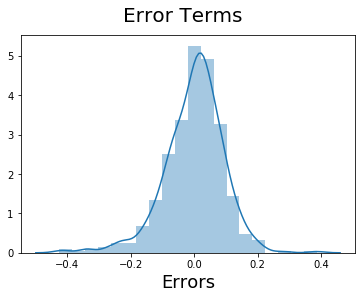

In [205]:
#plotting a histogram for error terms ,  normally distributed

fig=plt.figure()
sns.distplot((y_train-y_train_cnt), bins=20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

### Making Predictions by applying on Test set

In [206]:
#First let's scale the numerical variables in test set

num_vars2 = ['temp','hum','windspeed','cnt']
df_test[num_vars2] = scaler.transform(df_test[num_vars2])
df_test.head()

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Sept,may,Mon,Sat,Sun,Thur,Tue,Wed,light_snowrain,mist_cloudy
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


#### DIVIDING TEST set to X and Y 

In [208]:
y_test = df_test.pop('cnt')
X_test = df_test

In [209]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [210]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,...,Sept,may,Mon,Sat,Sun,Thur,Tue,Wed,light_snowrain,mist_cloudy
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [211]:
# Let's use our model to make predictions.

# Creating X_test_new dataframe
X_test_new = X_test[X_train_new7.columns]

In [212]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [213]:
#Making prediction

y_test_pred = lm71.predict(X_test_new)

#### R- Squared value calculation

In [214]:
#importing necessary library
from sklearn.metrics import r2_score


In [215]:
#R^2 value
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8089780460935856

### MODEL EVALUATION

Text(0, 0.5, 'y_pred')

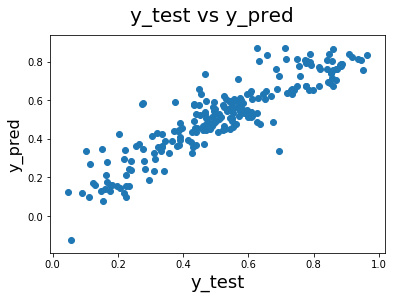

In [216]:
#plotting y_test and X_test to understand the spread 

fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)   


### Conclusion on Bike Sharing demand 
#### - The R-square value of our training model turned to 82.4 % and the test model to 80.89 which is almost 81% , we have built a  good model. The features which are significant to be considered for high demand in Bike_sharing are 'temp', 'spring', 'summer', 'winter', 'Jul', 'Sept', 'light_snowrain', 'mist_cloudy','yr', 'holiday'